In [1]:
!pip install matplotlib numpy pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("/content/sample_data/concrete_data.csv")
print(data.head())

   Cement  Blast Furnace Slag  Fly Ash  Water  ...  Coarse Aggregate  Fine Aggregate  Age  Strength
0   540.0                 0.0      0.0  162.0  ...            1040.0           676.0   28     79.99
1   540.0                 0.0      0.0  162.0  ...            1055.0           676.0   28     61.89
2   332.5               142.5      0.0  228.0  ...             932.0           594.0  270     40.27
3   332.5               142.5      0.0  228.0  ...             932.0           594.0  365     41.05
4   198.6               132.4      0.0  192.0  ...             978.4           825.5  360     44.30

[5 rows x 9 columns]


In [5]:
from sklearn.preprocessing import StandardScaler
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)



In [8]:
svr=SVR(kernel='rbf',C=10,epsilon=0.1,gamma="scale")
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print("mean_square_error = " ,mean_squared_error(y_test,y_pred) )
print("r2_score = " ,r2_score(y_test,y_pred) )


mean_square_error =  52.47682389342426
r2_score =  0.7963464127309696


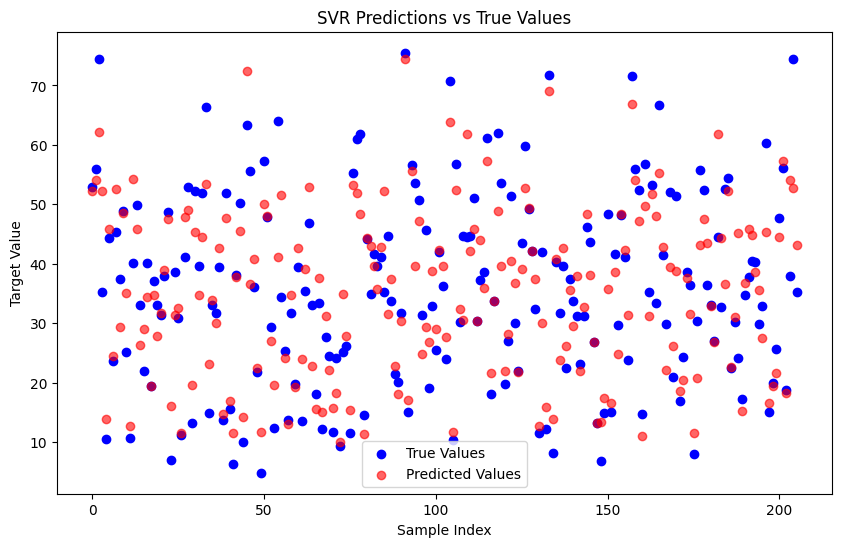

In [9]:
import matplotlib.pyplot as plt

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.title("SVR Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()
